In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reg = pd.read_csv('/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/searchlight_regions.csv')
all_reg = pd.read_csv('/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/localization.csv')

In [3]:
reg = reg.assign(unique_id = reg.subj.astype(str) + reg.electrode_name)
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
subj              122 non-null int64
space             122 non-null object
electrode_name    122 non-null object
unique_id         122 non-null object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [4]:
all_reg = all_reg.assign(unique_id = all_reg.subj.astype(str) + all_reg.electrode_name)
all_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 42 columns):
electrode_name                                                     920 non-null object
x_coordinate                                                       920 non-null float64
y_coordinate                                                       920 non-null float64
z_coordinate                                                       920 non-null float64
tissue_segmentation_label                                          920 non-null object
tissue_segmentation_distance_from_label_2                          920 non-null float64
AAL_label                                                          920 non-null object
AAL2_label                                                         920 non-null object
AAL3v1_1mm_label                                                   920 non-null object
AAL_JHU_combined_label                                             920 non-null object
AICHA_label          

In [5]:
reg = reg.merge(all_reg, on=['unique_id', 'subj', 'electrode_name'])
reg['AAL_no_hem'] = reg.AAL_label.apply(lambda x: x[0:-2])
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 44 columns):
subj                                                               122 non-null int64
space                                                              122 non-null object
electrode_name                                                     122 non-null object
unique_id                                                          122 non-null object
x_coordinate                                                       122 non-null float64
y_coordinate                                                       122 non-null float64
z_coordinate                                                       122 non-null float64
tissue_segmentation_label                                          122 non-null object
tissue_segmentation_distance_from_label_2                          122 non-null float64
AAL_label                                                          122 non-null object
AAL2_label            

In [6]:
avg = all_reg.AAL_label.value_counts().reset_index(name='total_counts')
avg.rename(columns={'index':'AAL_label'}, inplace=True)
avg.head()

,AAL_label,total_counts
0,NotInAtlas,259
1,Temporal_Mid_L,97
2,Temporal_Inf_L,62
3,Temporal_Inf_R,46
4,Frontal_Inf_Tri_L,38


In [7]:
sig_avg = reg.groupby('space').AAL_label.value_counts().reset_index(name='sig_counts')
sig_avg = sig_avg.merge(avg, on='AAL_label')
sig_avg = sig_avg.assign(percent = sig_avg.sig_counts/sig_avg.total_counts)
sig_avg.head()

,space,AAL_label,sig_counts,total_counts,percent
0,euclid,NotInAtlas,23,259,0.088803
1,latent,NotInAtlas,12,259,0.046332
2,euclid,Frontal_Inf_Tri_L,8,38,0.210526
3,latent,Frontal_Inf_Tri_L,2,38,0.052632
4,euclid,Frontal_Inf_Tri_R,4,14,0.285714


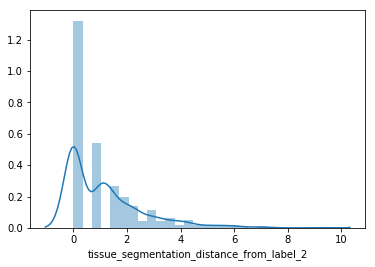

In [8]:
sns.distplot(all_reg.tissue_segmentation_distance_from_label_2)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

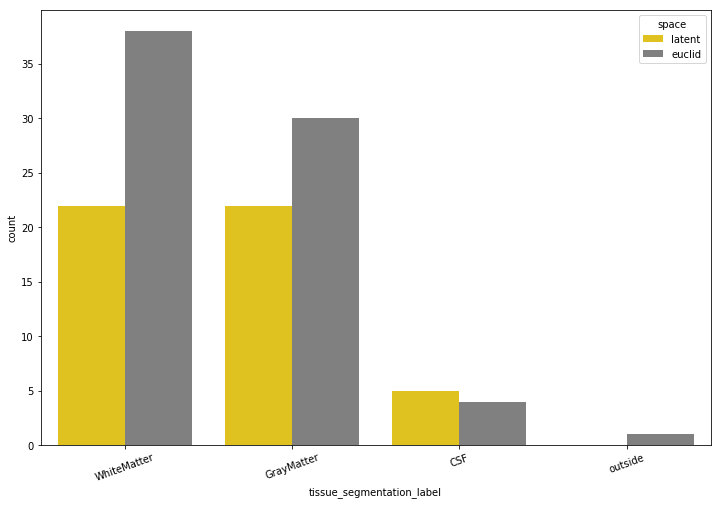

In [9]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='tissue_segmentation_label', hue='space', palette = ['gold','grey'])
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

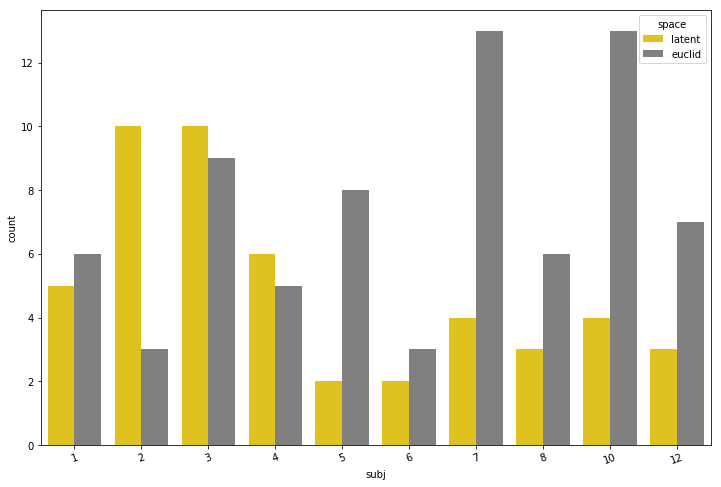

In [10]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='subj', hue='space', palette = ['gold','grey'])
plt.xticks(rotation=20)

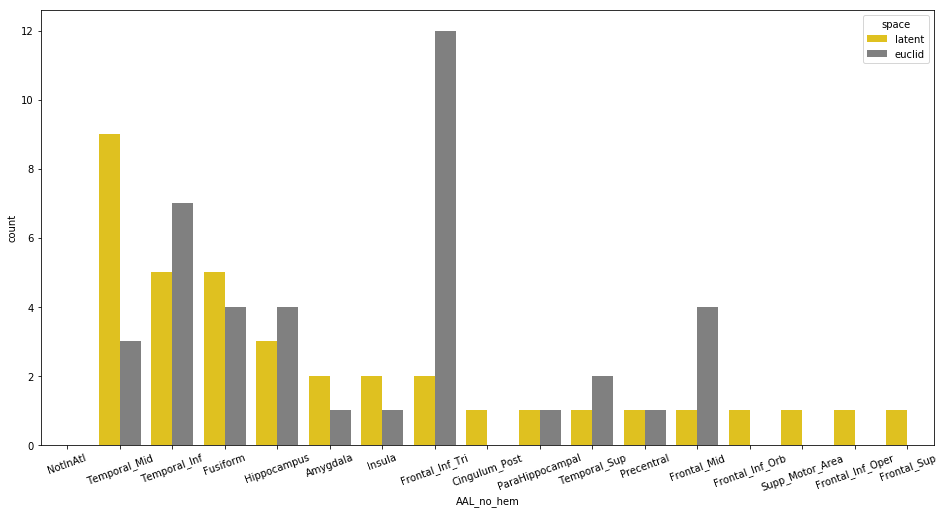

In [12]:
fig = plt.figure(figsize=(16,8))
atlas = 'AAL_no_hem'
sns.countplot(data=reg[reg.AAL_label != 'NotInAtlas'], x=atlas, hue='space', 
              palette = ['gold','grey'],
              order = reg.loc[(reg.space == 'latent'),atlas].value_counts().index)
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/gm_regions.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

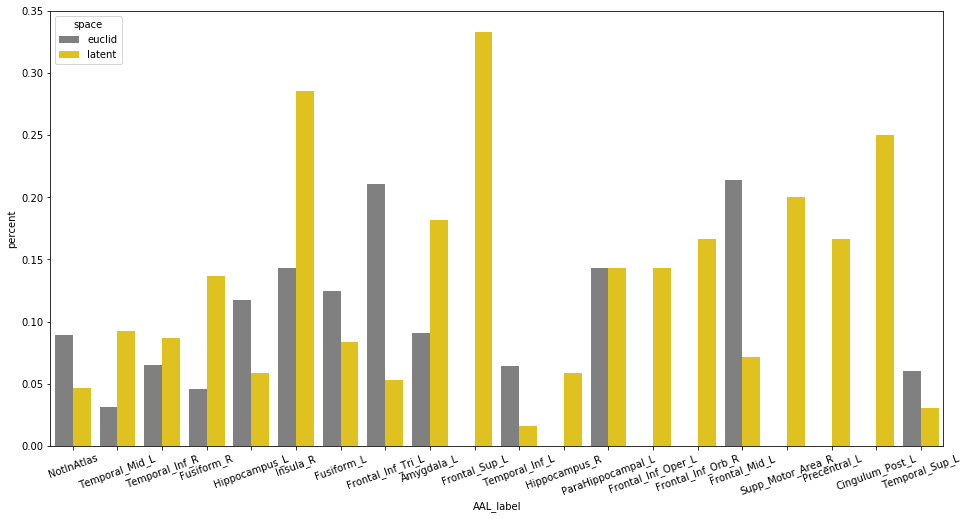

In [13]:
fig = plt.figure(figsize=(16,8))
sns.barplot(data=sig_avg, x='AAL_label', y='percent', hue='space', 
              palette = ['grey','gold'],
              order = reg.loc[(reg.space == 'latent'),'AAL_label'].value_counts().index)
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

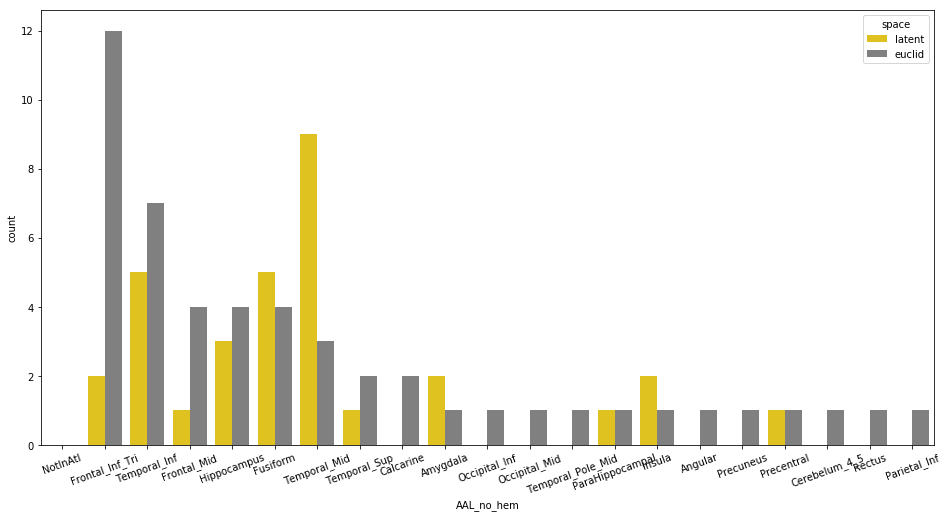

In [14]:
fig = plt.figure(figsize=(16,8))
atlas = 'AAL_no_hem'
sns.countplot(data=reg[reg.AAL_label != 'NotInAtlas'], x=atlas, hue='space', 
              palette = ['gold','grey'],
              order = reg.loc[(reg.space == 'euclid'),atlas].value_counts().index)
plt.xticks(rotation=20)

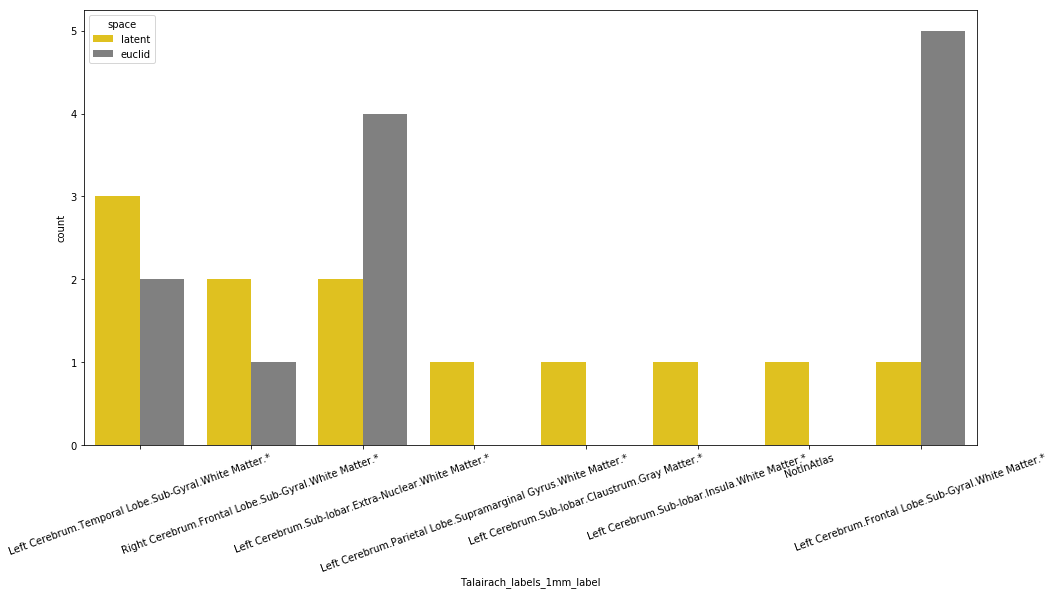

In [15]:
fig = plt.figure(figsize=(16,8))
atlas = 'Talairach_labels_1mm_label'
sns.countplot(data=reg[reg.AAL_label == 'NotInAtlas'], x=atlas, hue='space', palette = ['gold','grey'],
             order = reg.loc[(reg.AAL_label == 'NotInAtlas') & (reg.space == 'latent'),atlas].value_counts().index)
plt.xticks(rotation=20)
plt.savefig(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_img/wm_regions.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

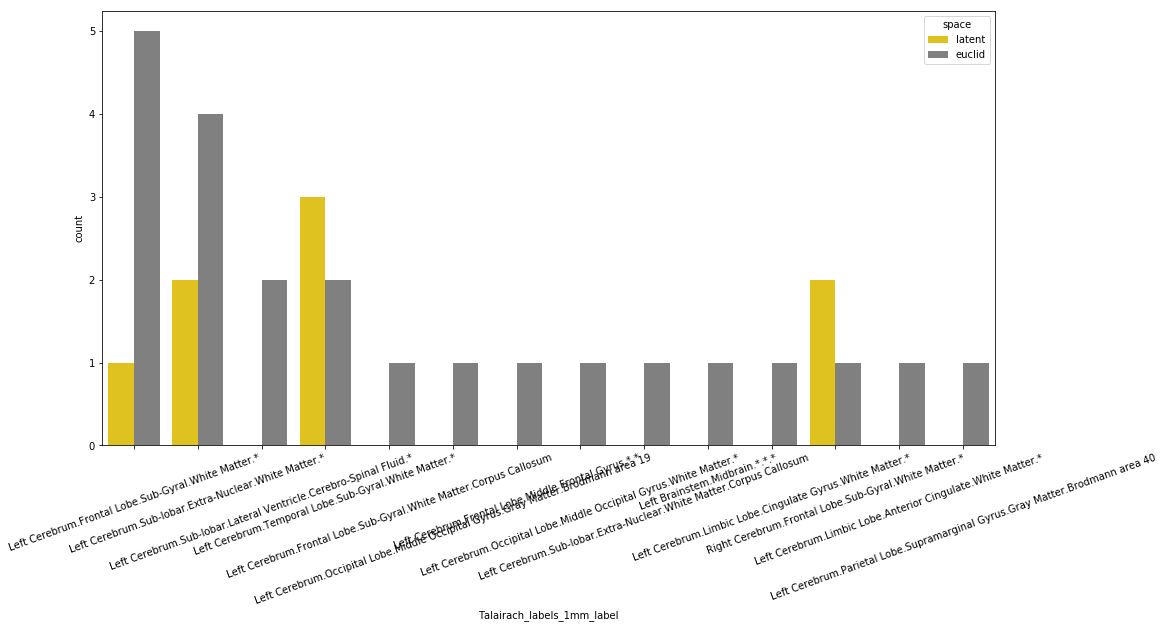

In [16]:
fig = plt.figure(figsize=(16,8))
atlas = 'Talairach_labels_1mm_label'
sns.countplot(data=reg[reg.AAL_label == 'NotInAtlas'], x=atlas, hue='space', palette = ['gold','grey'],
             order = reg.loc[(reg.AAL_label == 'NotInAtlas') & (reg.space == 'euclid'),atlas].value_counts().index)
plt.xticks(rotation=20)

5.09901951359278
0.0


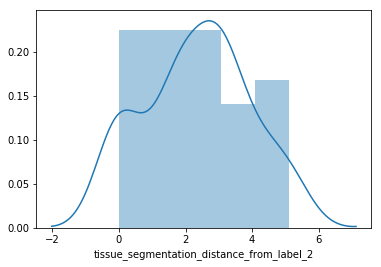

In [17]:
print(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2.max())
print(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2.min())
sns.distplot(reg[reg.AAL_label == 'NotInAtlas'].tissue_segmentation_distance_from_label_2)

In [18]:
reg[reg.AAL_label == 'NotInAtlas']

,subj,space,electrode_name,unique_id,x_coordinate,y_coordinate,z_coordinate,tissue_segmentation_label,tissue_segmentation_distance_from_label_2,AAL_label,...,Schaefer2018_600Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_700Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_800Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_900Parcels_17Networks_order_FSLMNI152_1mm_label,Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_1mm_label,Talairach_labels_1mm_region_number,Talairach_labels_1mm_label,Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_resliced_label,Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_resliced_label,AAL_no_hem
2,1,latent,LI04,1LI04,-24.88220,0.834579,14.616437,WhiteMatter,1.732051,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,439,Left Cerebrum.Sub-lobar.Insula.White Matter.*,NotInAtlas,NotInAtlas,NotInAtl
3,1,latent,LI05,1LI05,-23.85100,-0.834554,18.609980,WhiteMatter,2.828427,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,347,Left Cerebrum.Sub-lobar.Extra-Nuclear.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
9,2,latent,RE01,2RE01,30.95840,50.765000,-16.334416,GrayMatter,0.000000,NotInAtlas,...,17Networks_RH_LimbicA_TempPole_2,17Networks_RH_LimbicA_TempPole_2,17Networks_RH_LimbicA_TempPole_2,17Networks_RH_LimbicA_TempPole_3,17Networks_RH_LimbicA_TempPole_10,0,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtl
19,3,latent,LB07,3LB07,-36.87830,-13.436200,-16.376385,WhiteMatter,3.741657,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,51,Left Cerebrum.Temporal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
20,3,latent,LB08,3LB08,-40.10880,-16.467900,-15.319071,WhiteMatter,2.000000,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,51,Left Cerebrum.Temporal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
21,3,latent,LB09,3LB09,-43.81480,-19.506800,-14.232142,GrayMatter,0.000000,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,51,Left Cerebrum.Temporal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
24,3,latent,LH05,3LH05,-18.45130,-29.542500,7.166672,WhiteMatter,4.242641,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,347,Left Cerebrum.Sub-lobar.Extra-Nuclear.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
25,4,latent,LA06,4LA06,-36.76680,6.064190,-21.525584,GrayMatter,0.000000,NotInAtlas,...,17Networks_LH_SalVentAttnA_Ins_4,17Networks_LH_SalVentAttnA_Ins_2,17Networks_LH_SalVentAttnA_Ins_3,17Networks_LH_SalVentAttnA_Ins_5,17Networks_LH_SalVentAttnA_Ins_6,449,Left Cerebrum.Sub-lobar.Claustrum.Gray Matter.*,NotInAtlas,NotInAtlas,NotInAtl
35,6,latent,RH04,6RH04,25.57930,4.106560,31.641467,WhiteMatter,5.099020,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,194,Right Cerebrum.Frontal Lobe.Sub-Gyral.White Ma...,NotInAtlas,NotInAtlas,NotInAtl
41,8,latent,LF05,8LF05,-28.15550,12.779600,36.919185,WhiteMatter,1.732051,NotInAtlas,...,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,NotInAtlas,193,Left Cerebrum.Frontal Lobe.Sub-Gyral.White Mat...,NotInAtlas,NotInAtlas,NotInAtl
